In [1]:
import matplotlib.pyplot as plt
import cv2
import pytesseract

In [2]:
# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
# Read image from which text needs to be extracted
img = cv2.imread('devanagari-alphabet-chart.jpg')

In [4]:
# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [5]:

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (90, 90))

In [6]:
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [7]:
# Creating a copy of image
im2 = img.copy()

In [8]:
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
      # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
      # Open the file in append mode
    file = open("recognized.txt", "a+", encoding='utf-16')
     # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped, lang='hin')

In [9]:
#text = pytesseract.image_to_string(image, lang='hin')

In [10]:
    
    # Appending the text into file
    file.write(text)
    file.write("\n")
    
    # Close the file
    file.close
    
    

    

   

<function TextIOWrapper.close()>

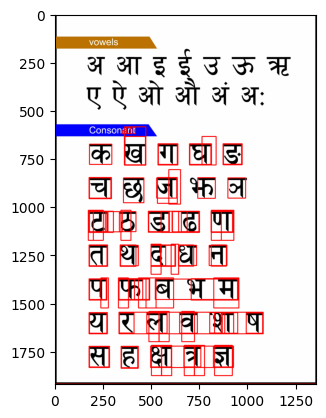

In [18]:
imgbox = pytesseract.image_to_boxes(img)
imgH,imgW,_ = img.shape
for boxes in imgbox.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img, (x,imgH-y),(w,imgH-h),(255,0,0),3)
    
plt.imshow(img)

In [16]:
print(text)

अआइईउऊकऋ
एऐओ ओऔ

क खगबधड़
चछुजकमलनज

ट०5०डढ्ण
तथदबधन

पर फबभम
यरलव शपष
सहलझन्लनत्रज्ञ


